In [323]:
import pandas as pd
import numpy as np
import hvplot
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [324]:
data = pd.read_csv("NYPD_Shooting_Incident_Data__Historic_.csv")
data_year_tod = pd.read_csv("NYPD_Shooting_Incident_Data__Year_To_Date_.csv")

In [325]:
print(f"In 2020, there are {data_year_tod.shape[0]} incidents.")

In 2020, there are 664 incidents.


In [326]:
print(f"Before 2020, there are {data.shape[0]} incidents.")

Before 2020, there are 21626 incidents.


In [327]:
data.shape[0]   ##

21626

In [328]:
data.shape[1]   ##

19

In [329]:
# data.shape[0,1]   this output an error

In [330]:
data_year_tod.shape ##

(664, 19)

In [331]:
#combined two data sets( 2006 - 2020)
df = pd.concat([data,data_year_tod],axis = 0).copy()    ## i put the copy at the end
print(f"After combining two datasets, there are {df.shape[0]} incidents in total.")

After combining two datasets, there are 22290 incidents in total.


In [332]:
df.columns

Index(['BORO', 'INCIDENT_KEY', 'JURISDICTION_CODE', 'LOCATION_DESC',
       'Latitude', 'Lon_Lat', 'Longitude', 'New Georeferenced Column',
       'OCCUR_DATE', 'OCCUR_TIME', 'PERP_AGE_GROUP', 'PERP_RACE', 'PERP_SEX',
       'PRECINCT', 'STATISTICAL_MURDER_FLAG', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD'],
      dtype='object')

In [333]:
#Drop columns
df.drop(columns= ['JURISDICTION_CODE', 'LOCATION_DESC','Latitude', 'Lon_Lat', 'Longitude', 
                  'New Georeferenced Column','PRECINCT','PERP_AGE_GROUP', 'PERP_RACE', 'PERP_SEX','X_COORD_CD', 
                  'Y_COORD_CD'],inplace = True)

In [334]:
df.columns

Index(['BORO', 'INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME',
       'STATISTICAL_MURDER_FLAG', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [335]:
df.head()

,BORO,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,STATISTICAL_MURDER_FLAG,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,QUEENS,74146165,08/14/2010,3:11:00,False,25-44,BLACK,M
1,BROOKLYN,66928846,10/17/2009,18:03:00,True,45-64,BLACK,M
2,BROOKLYN,29114164,05/18/2007,23:00:00,False,25-44,BLACK,M
3,BROOKLYN,85180336,06/09/2012,17:15:00,False,25-44,BLACK,M
4,BRONX,73405770,06/27/2010,4:14:00,False,25-44,BLACK,M


In [336]:
miss_check = pd.DataFrame({"Number of Missing":df.isnull().sum(),
                           "Percentage of Missing":df.isnull().sum()/df.shape[0]})

In [337]:
miss_check       ## this is asking if there are any nulls in any of values in df

,Number of Missing,Percentage of Missing
BORO,0,0.0
INCIDENT_KEY,0,0.0
OCCUR_DATE,0,0.0
OCCUR_TIME,0,0.0
STATISTICAL_MURDER_FLAG,0,0.0
VIC_AGE_GROUP,0,0.0
VIC_RACE,0,0.0
VIC_SEX,0,0.0


In [338]:
df.shape

(22290, 8)

In [339]:
miss_drop = df.dropna().copy() ## ????????  why didnt u put .copy() at the end here? as u did below w/ "full_data"???

In [340]:
## wud like to know the reasons for when to use 1) np vs 2) dummies ( i think jsut for 0 and 1)
## vs 3) onehot encoder
## i guess to reduce features (column headings) u cud have 1-5 vs many columns of 0 and 1 data

In [341]:
# VIC_AGE transforming
miss_drop['VIC_AGE_18'] = np.where(np.array(miss_drop['VIC_AGE_GROUP']) == "<18",1,0)
miss_drop['VIC_AGE_18_24'] = np.where(np.array(miss_drop['VIC_AGE_GROUP']) == "18-24",1,0)
miss_drop['VIC_AGE_25_44'] = np.where(np.array(miss_drop['VIC_AGE_GROUP']) == "25-44",1,0)
miss_drop['VIC_AGE_45_64'] = np.where(np.array(miss_drop['VIC_AGE_GROUP']) == "45-64",1,0)
miss_drop['VIC_AGE_65'] = np.where(np.array(miss_drop['VIC_AGE_GROUP']) == "65+",1,0)

In [342]:
# victim gender transforming
miss_drop['VIC_SEX_MALE'] = np.where(np.array(miss_drop['VIC_SEX']) == "M",1,0)
miss_drop['VIC_SEX_FEMALE'] = np.where(np.array(miss_drop['VIC_SEX']) == "F",1,0)

In [343]:
miss_drop.VIC_RACE.unique()

array(['BLACK', 'BLACK HISPANIC', 'WHITE HISPANIC', 'WHITE',
       'ASIAN / PACIFIC ISLANDER', 'UNKNOWN',
       'AMERICAN INDIAN/ALASKAN NATIVE'], dtype=object)

In [344]:
# victim race transforming
miss_drop['VIC_RACE_BLACK'] = np.where(np.array(miss_drop['VIC_RACE']) == "BLACK",1,0)
miss_drop['VIC_RACE_BLACK_HIS'] = np.where(np.array(miss_drop['VIC_RACE']) == 'BLACK HISPANIC',1,0)
miss_drop['VIC_RACE_WHITE_HIS'] = np.where(np.array(miss_drop['VIC_RACE']) == 'WHITE HISPANIC',1,0)
miss_drop['VIC_RACE_ASIAN_PAR'] = np.where(np.array(miss_drop['VIC_RACE']) == 'ASIAN / PACIFIC ISLANDER',1,0)
miss_drop['VIC_RACE_AMERICAN_ALA'] = np.where(np.array(miss_drop['VIC_RACE']) == 'AMERICAN INDIAN/ALASKAN NATIVE',1,0)

In [345]:
miss_drop.BORO.unique()

array(['QUEENS', 'BROOKLYN', 'BRONX', 'MANHATTAN', 'STATEN ISLAND'],
      dtype=object)

In [346]:
#  boro transforming
miss_drop['BORO_QUEENS'] = np.where(np.array(miss_drop['BORO']) == 'QUEENS',1,0)
miss_drop['BORO_BROOKLYN'] = np.where(np.array(miss_drop['BORO']) == 'BROOKLYN',1,0)
miss_drop['BORO_BRONX'] = np.where(np.array(miss_drop['BORO']) == 'BRONX',1,0)
miss_drop['BORO_MANHATTAN'] = np.where(np.array(miss_drop['BORO']) == 'MANHATTAN',1,0)
miss_drop['BORO_STATEN'] = np.where(np.array(miss_drop['BORO']) == 'STATEN ISLAND',1,0)

In [347]:
miss_drop.head(5)

,BORO,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,STATISTICAL_MURDER_FLAG,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,VIC_AGE_18,VIC_AGE_18_24,...,VIC_RACE_BLACK,VIC_RACE_BLACK_HIS,VIC_RACE_WHITE_HIS,VIC_RACE_ASIAN_PAR,VIC_RACE_AMERICAN_ALA,BORO_QUEENS,BORO_BROOKLYN,BORO_BRONX,BORO_MANHATTAN,BORO_STATEN
0,QUEENS,74146165,08/14/2010,3:11:00,False,25-44,BLACK,M,0,0,...,1,0,0,0,0,1,0,0,0,0
1,BROOKLYN,66928846,10/17/2009,18:03:00,True,45-64,BLACK,M,0,0,...,1,0,0,0,0,0,1,0,0,0
2,BROOKLYN,29114164,05/18/2007,23:00:00,False,25-44,BLACK,M,0,0,...,1,0,0,0,0,0,1,0,0,0
3,BROOKLYN,85180336,06/09/2012,17:15:00,False,25-44,BLACK,M,0,0,...,1,0,0,0,0,0,1,0,0,0
4,BRONX,73405770,06/27/2010,4:14:00,False,25-44,BLACK,M,0,0,...,1,0,0,0,0,0,0,1,0,0


In [348]:
#Date processing and get Year, Month, Day
import datetime as dt

miss_drop.OCCUR_DATE = pd.to_datetime(miss_drop.OCCUR_DATE)
miss_drop['OCCUR_YEAR'] = miss_drop.OCCUR_DATE.dt.year
miss_drop['OCCUR_MONTH'] = miss_drop.OCCUR_DATE.dt.month
miss_drop['OCCUR_Day'] = miss_drop.OCCUR_DATE.dt.day
miss_drop['OCCUR_Hour'] = pd.to_datetime(miss_drop.OCCUR_TIME).dt.hour

In [349]:
miss_drop.head(5)

,BORO,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,STATISTICAL_MURDER_FLAG,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,VIC_AGE_18,VIC_AGE_18_24,...,VIC_RACE_AMERICAN_ALA,BORO_QUEENS,BORO_BROOKLYN,BORO_BRONX,BORO_MANHATTAN,BORO_STATEN,OCCUR_YEAR,OCCUR_MONTH,OCCUR_Day,OCCUR_Hour
0,QUEENS,74146165,2010-08-14,3:11:00,False,25-44,BLACK,M,0,0,...,0,1,0,0,0,0,2010,8,14,3
1,BROOKLYN,66928846,2009-10-17,18:03:00,True,45-64,BLACK,M,0,0,...,0,0,1,0,0,0,2009,10,17,18
2,BROOKLYN,29114164,2007-05-18,23:00:00,False,25-44,BLACK,M,0,0,...,0,0,1,0,0,0,2007,5,18,23
3,BROOKLYN,85180336,2012-06-09,17:15:00,False,25-44,BLACK,M,0,0,...,0,0,1,0,0,0,2012,6,9,17
4,BRONX,73405770,2010-06-27,4:14:00,False,25-44,BLACK,M,0,0,...,0,0,0,1,0,0,2010,6,27,4


In [350]:
full_data = miss_drop.copy()

In [351]:
full_data.columns

Index(['BORO', 'INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME',
       'STATISTICAL_MURDER_FLAG', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
       'VIC_AGE_18', 'VIC_AGE_18_24', 'VIC_AGE_25_44', 'VIC_AGE_45_64',
       'VIC_AGE_65', 'VIC_SEX_MALE', 'VIC_SEX_FEMALE', 'VIC_RACE_BLACK',
       'VIC_RACE_BLACK_HIS', 'VIC_RACE_WHITE_HIS', 'VIC_RACE_ASIAN_PAR',
       'VIC_RACE_AMERICAN_ALA', 'BORO_QUEENS', 'BORO_BROOKLYN', 'BORO_BRONX',
       'BORO_MANHATTAN', 'BORO_STATEN', 'OCCUR_YEAR', 'OCCUR_MONTH',
       'OCCUR_Day', 'OCCUR_Hour'],
      dtype='object')

In [352]:
#drop columns
full_data = full_data.drop(columns=['STATISTICAL_MURDER_FLAG', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX','BORO'])

In [353]:
full_data.head()


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,VIC_AGE_18,VIC_AGE_18_24,VIC_AGE_25_44,VIC_AGE_45_64,VIC_AGE_65,VIC_SEX_MALE,VIC_SEX_FEMALE,...,VIC_RACE_AMERICAN_ALA,BORO_QUEENS,BORO_BROOKLYN,BORO_BRONX,BORO_MANHATTAN,BORO_STATEN,OCCUR_YEAR,OCCUR_MONTH,OCCUR_Day,OCCUR_Hour
0,74146165,2010-08-14,3:11:00,0,0,1,0,0,1,0,...,0,1,0,0,0,0,2010,8,14,3
1,66928846,2009-10-17,18:03:00,0,0,0,1,0,1,0,...,0,0,1,0,0,0,2009,10,17,18
2,29114164,2007-05-18,23:00:00,0,0,1,0,0,1,0,...,0,0,1,0,0,0,2007,5,18,23
3,85180336,2012-06-09,17:15:00,0,0,1,0,0,1,0,...,0,0,1,0,0,0,2012,6,9,17
4,73405770,2010-06-27,4:14:00,0,0,1,0,0,1,0,...,0,0,0,1,0,0,2010,6,27,4


In [354]:
full_data.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'VIC_AGE_18',
       'VIC_AGE_18_24', 'VIC_AGE_25_44', 'VIC_AGE_45_64', 'VIC_AGE_65',
       'VIC_SEX_MALE', 'VIC_SEX_FEMALE', 'VIC_RACE_BLACK',
       'VIC_RACE_BLACK_HIS', 'VIC_RACE_WHITE_HIS', 'VIC_RACE_ASIAN_PAR',
       'VIC_RACE_AMERICAN_ALA', 'BORO_QUEENS', 'BORO_BROOKLYN', 'BORO_BRONX',
       'BORO_MANHATTAN', 'BORO_STATEN', 'OCCUR_YEAR', 'OCCUR_MONTH',
       'OCCUR_Day', 'OCCUR_Hour'],
      dtype='object')

In [355]:
#Group by Year, Month to get monthly data
full_data_group = full_data.groupby(["OCCUR_YEAR","OCCUR_MONTH"])['VIC_AGE_18',
       'VIC_AGE_18_24', 'VIC_AGE_25_44', 'VIC_AGE_45_64', 'VIC_AGE_65',
       'VIC_SEX_MALE', 'VIC_SEX_FEMALE', 'VIC_RACE_BLACK',
       'VIC_RACE_BLACK_HIS', 'VIC_RACE_WHITE_HIS', 'VIC_RACE_ASIAN_PAR',
       'VIC_RACE_AMERICAN_ALA', 'BORO_QUEENS', 'BORO_BROOKLYN', 'BORO_BRONX',
       'BORO_MANHATTAN', 'BORO_STATEN'].sum()

In [356]:
full_data_group.head()

VIC_AGE_18  VIC_AGE_18_24  VIC_AGE_25_44  \
OCCUR_YEAR OCCUR_MONTH                                             
2006       1                    15             58             51   
           2                    11             38             40   
           3                    14             46             36   
           4                    21             64             62   
           5                    29             73             63   

                        VIC_AGE_45_64  VIC_AGE_65  VIC_SEX_MALE  \
OCCUR_YEAR OCCUR_MONTH                                            
2006       1                        5           0           123   
           2                        8           0            91   
           3                        6           0            96   
           4                        7           2           144   
           5                        6           2           161   

                        VIC_SEX_FEMALE  VIC_RACE_BLACK  VIC_RACE_BLACK_HIS  \
OCCUR_YEAR OCCUR_MONTH                                                       
2006       1                         6              86                   6   
           2                         6              63                   4   
           3                         6              74                   1   
           4                        12             103                   2   
           5                        12             126                   3   

                        VIC_RACE_WHITE_HIS  VIC_RACE_ASIAN_PAR  \
OCCUR_YEAR OCCUR_MONTH                                           
2006       1                            24                   6   
           2                            21                   5   
           3                            22                   1   
           4                            47                   1   
           5                            40                   0   

                        VIC_RACE_AMERICAN_ALA  BORO_QUEENS  BORO_BROOKLYN  \
OCCUR_YEAR OCCUR_MONTH                                                      
2006       1                                0           18             49   
           2                                0           23             34   
           3                                0            9             48   
           4                                0           29             54   
           5                                0           18             80   

                        BORO_BRONX  BORO_MANHATTAN  BORO_STATEN  
OCCUR_YEAR OCCUR_MONTH                                           
2006       1                    40              16            6  
           2                    22              16            2  
           3                    27              14            4  
           4                    46              20            7  
           5                    46              27            2

In [357]:
number_of_incident = full_data.groupby(['OCCUR_YEAR',"OCCUR_MONTH"]).count()['INCIDENT_KEY'].values

In [358]:
## number_of_incident  if u wanted to - this gives u the value for each row in the given feature (column)
## what do u need this for?^

In [359]:
full_data_group['Number_of_Incident'] = number_of_incident

## what do u need this for?^

In [360]:
full_data_group.head()

VIC_AGE_18  VIC_AGE_18_24  VIC_AGE_25_44  \
OCCUR_YEAR OCCUR_MONTH                                             
2006       1                    15             58             51   
           2                    11             38             40   
           3                    14             46             36   
           4                    21             64             62   
           5                    29             73             63   

                        VIC_AGE_45_64  VIC_AGE_65  VIC_SEX_MALE  \
OCCUR_YEAR OCCUR_MONTH                                            
2006       1                        5           0           123   
           2                        8           0            91   
           3                        6           0            96   
           4                        7           2           144   
           5                        6           2           161   

                        VIC_SEX_FEMALE  VIC_RACE_BLACK  VIC_RACE_BLACK_HIS  \
OCCUR_YEAR OCCUR_MONTH                                                       
2006       1                         6              86                   6   
           2                         6              63                   4   
           3                         6              74                   1   
           4                        12             103                   2   
           5                        12             126                   3   

                        VIC_RACE_WHITE_HIS  VIC_RACE_ASIAN_PAR  \
OCCUR_YEAR OCCUR_MONTH                                           
2006       1                            24                   6   
           2                            21                   5   
           3                            22                   1   
           4                            47                   1   
           5                            40                   0   

                        VIC_RACE_AMERICAN_ALA  BORO_QUEENS  BORO_BROOKLYN  \
OCCUR_YEAR OCCUR_MONTH                                                      
2006       1                                0           18             49   
           2                                0           23             34   
           3                                0            9             48   
           4                                0           29             54   
           5                                0           18             80   

                        BORO_BRONX  BORO_MANHATTAN  BORO_STATEN  \
OCCUR_YEAR OCCUR_MONTH                                            
2006       1                    40              16            6   
           2                    22              16            2   
           3                    27              14            4   
           4                    46              20            7   
           5                    46              27            2   

                        Number_of_Incident  
OCCUR_YEAR OCCUR_MONTH                      
2006       1                           129  
           2                            97  
           3                           102  
           4                           156  
           5                           173

In [361]:
full_data_group.tail(6)

VIC_AGE_18  VIC_AGE_18_24  VIC_AGE_25_44  \
OCCUR_YEAR OCCUR_MONTH                                             
2020       1                     5             19             57   
           2                     2             15             31   
           3                     3             17             45   
           4                     4             19             39   
           5                     6             35             71   
           6                    17             72            146   

                        VIC_AGE_45_64  VIC_AGE_65  VIC_SEX_MALE  \
OCCUR_YEAR OCCUR_MONTH                                            
2020       1                        8           0            80   
           2                        1           0            47   
           3                        6           0            64   
           4                        5           1            67   
           5                       12           2           113   
           6                       21           1           221   

                        VIC_SEX_FEMALE  VIC_RACE_BLACK  VIC_RACE_BLACK_HIS  \
OCCUR_YEAR OCCUR_MONTH                                                       
2020       1                         9              57                   7   
           2                         4              34                   2   
           3                         7              57                   7   
           4                         2              52                   4   
           5                        12              82                  14   
           6                        32             194                  24   

                        VIC_RACE_WHITE_HIS  VIC_RACE_ASIAN_PAR  \
OCCUR_YEAR OCCUR_MONTH                                           
2020       1                            19                   1   
           2                             9                   0   
           3                             5                   2   
           4                            10                   2   
           5                            27                   0   
           6                            30                   3   

                        VIC_RACE_AMERICAN_ALA  BORO_QUEENS  BORO_BROOKLYN  \
OCCUR_YEAR OCCUR_MONTH                                                      
2020       1                                0           19             25   
           2                                0           17             14   
           3                                0            9             28   
           4                                0            9             29   
           5                                0           25             47   
           6                                0           36            106   

                        BORO_BRONX  BORO_MANHATTAN  BORO_STATEN  \
OCCUR_YEAR OCCUR_MONTH                                            
2020       1                    24              20            1   
           2                    11               6            3   
           3                    13              18            3   
           4                    19              10            2   
           5                    28              18            8   
           6                    78              34            4   

                        Number_of_Incident  
OCCUR_YEAR OCCUR_MONTH                      
2020       1                            89  
           2                            51  
           3                            71  
           4                            69  
           5                           126  
           6                           258

In [362]:
full_data_group.reset_index().shape

(174, 20)

In [363]:
#Unemployment processing

unemployment = pd.read_csv('UnemploymentRate.22.csv')

In [364]:
unemployment.head()


,Date,PX_LAST
0,9/30/2020,7.9
1,8/31/2020,8.4
2,7/31/2020,10.2
3,6/30/2020,11.1
4,5/31/2020,13.3


In [365]:
unemployment.tail()

,Date,PX_LAST
184,5/31/2005,5.1
185,4/30/2005,5.2
186,3/31/2005,5.2
187,2/28/2005,5.4
188,1/31/2005,5.3


In [366]:
unemployment = unemployment.reset_index()

In [367]:
unemployment.Date = pd.to_datetime(unemployment.Date)
unemployment['Year'] = unemployment.Date.dt.year
unemployment['Month'] = unemployment.Date.dt.month

In [368]:
unemployment_group = unemployment.groupby(['Year','Month'])['PX_LAST'].mean()


In [369]:
unemployment_group = pd.DataFrame(unemployment_group)
unemployment_group.head()
unemployment_group.reset_index(inplace = True)

In [370]:
unemployment_group.rename(columns= {'PX_LAST':"UnemploymentRate"},inplace = True)

In [371]:
unemployment_group.head()

,Year,Month,UnemploymentRate
0,2005,1,5.3
1,2005,2,5.4
2,2005,3,5.2
3,2005,4,5.2
4,2005,5,5.1


In [372]:
# NYC Empire dataset

ny_empire = pd.read_csv('NY.Empire.22.csv')
ny_empire.head()

,Date,PX_LAST
0,9/30/2020,17.0
1,8/31/2020,3.7
2,7/31/2020,17.2
3,6/30/2020,-0.2
4,5/31/2020,-48.5


In [373]:
ny_empire.Date = pd.to_datetime(ny_empire.Date)
ny_empire['Year'] = ny_empire.Date.dt.year
ny_empire['Month'] = ny_empire.Date.dt.month
ny_empire.rename(columns= {'PX_LAST':"NY_Empire"},inplace = True)
ny_empire = ny_empire.groupby(['Year','Month'])['NY_Empire'].mean()

In [374]:
ny_empire = pd.DataFrame(ny_empire)
ny_empire.head()

NY_Empire
Year Month           
2005 1           15.6
     2           17.1
     3           24.3
     4            8.3
     5           -4.9

In [375]:
#GDP data upload
gdp = pd.read_csv('GDP.Q.22.csv')
gdp.head()

,Date,PX_LAST
0,6/30/2020,-31.4
1,3/31/2020,-5.0
2,12/31/2019,2.4
3,9/30/2019,2.6
4,6/30/2019,1.5


In [376]:
gdp.Date = pd.to_datetime(gdp.Date)
gdp = gdp.set_index('Date').resample('M').interpolate(method = 'ffill', 
                                                       limit_direction = 'backward').fillna(method = 'ffill')


In [377]:
gdp.head()

,PX_LAST
Date,
2005-03-31,4.5
2005-04-30,4.5
2005-05-31,4.5
2005-06-30,1.9
2005-07-31,1.9


In [378]:
gdp = gdp.reset_index()
gdp['Year'] = gdp.Date.dt.year
gdp['Month'] = gdp.Date.dt.month
gdp.rename(columns= {'PX_LAST':"GDP"},inplace = True)
gdp = gdp.drop(columns = ['Date'])

In [379]:
#Combine those four dataset(gun shooting + employment + gdp + ny_empire)
combined = pd.concat([full_data_group,unemployment_group.set_index(['Year','Month']),ny_empire,
                     gdp.set_index(['Year','Month'])],
                    join='inner',axis = 1,sort = True)


In [380]:
final_data = pd.DataFrame(combined)

In [381]:
final_data.head(5)

VIC_AGE_18  VIC_AGE_18_24  VIC_AGE_25_44  VIC_AGE_45_64  VIC_AGE_65  \
2006 1          15             58             51              5           0   
     2          11             38             40              8           0   
     3          14             46             36              6           0   
     4          21             64             62              7           2   
     5          29             73             63              6           2   

        VIC_SEX_MALE  VIC_SEX_FEMALE  VIC_RACE_BLACK  VIC_RACE_BLACK_HIS  \
2006 1           123               6              86                   6   
     2            91               6              63                   4   
     3            96               6              74                   1   
     4           144              12             103                   2   
     5           161              12             126                   3   

        VIC_RACE_WHITE_HIS  ...  VIC_RACE_AMERICAN_ALA  BORO_QUEENS  \
2006 1                  24  ...                      0           18   
     2                  21  ...                      0           23   
     3                  22  ...                      0            9   
     4                  47  ...                      0           29   
     5                  40  ...                      0           18   

        BORO_BROOKLYN  BORO_BRONX  BORO_MANHATTAN  BORO_STATEN  \
2006 1             49          40              16            6   
     2             34          22              16            2   
     3             48          27              14            4   
     4             54          46              20            7   
     5             80          46              27            2   

        Number_of_Incident  UnemploymentRate  NY_Empire  GDP  
2006 1                 129               4.7       17.5  2.6  
     2                  97               4.8       20.9  2.6  
     3                 102               4.7       33.2  5.4  
     4                 156               4.7       18.5  5.4  
     5                 173               4.6       18.6  5.4  

[5 rows x 21 columns]

In [382]:
# Linear Regression

In [383]:
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [384]:
final_data_1 = final_data.drop('Number_of_Incident', axis=1)

final_data_1.head()

VIC_AGE_18  VIC_AGE_18_24  VIC_AGE_25_44  VIC_AGE_45_64  VIC_AGE_65  \
2006 1          15             58             51              5           0   
     2          11             38             40              8           0   
     3          14             46             36              6           0   
     4          21             64             62              7           2   
     5          29             73             63              6           2   

        VIC_SEX_MALE  VIC_SEX_FEMALE  VIC_RACE_BLACK  VIC_RACE_BLACK_HIS  \
2006 1           123               6              86                   6   
     2            91               6              63                   4   
     3            96               6              74                   1   
     4           144              12             103                   2   
     5           161              12             126                   3   

        VIC_RACE_WHITE_HIS  VIC_RACE_ASIAN_PAR  VIC_RACE_AMERICAN_ALA  \
2006 1                  24                   6                      0   
     2                  21                   5                      0   
     3                  22                   1                      0   
     4                  47                   1                      0   
     5                  40                   0                      0   

        BORO_QUEENS  BORO_BROOKLYN  BORO_BRONX  BORO_MANHATTAN  BORO_STATEN  \
2006 1           18             49          40              16            6   
     2           23             34          22              16            2   
     3            9             48          27              14            4   
     4           29             54          46              20            7   
     5           18             80          46              27            2   

        UnemploymentRate  NY_Empire  GDP  
2006 1               4.7       17.5  2.6  
     2               4.8       20.9  2.6  
     3               4.7       33.2  5.4  
     4               4.7       18.5  5.4  
     5               4.6       18.6  5.4

In [385]:
# Linear Regression
final_data_1.columns

Index(['VIC_AGE_18', 'VIC_AGE_18_24', 'VIC_AGE_25_44', 'VIC_AGE_45_64',
       'VIC_AGE_65', 'VIC_SEX_MALE', 'VIC_SEX_FEMALE', 'VIC_RACE_BLACK',
       'VIC_RACE_BLACK_HIS', 'VIC_RACE_WHITE_HIS', 'VIC_RACE_ASIAN_PAR',
       'VIC_RACE_AMERICAN_ALA', 'BORO_QUEENS', 'BORO_BROOKLYN', 'BORO_BRONX',
       'BORO_MANHATTAN', 'BORO_STATEN', 'UnemploymentRate', 'NY_Empire',
       'GDP'],
      dtype='object')

In [388]:

X = final_data_1[['VIC_AGE_18', 'VIC_AGE_18_24', 'VIC_AGE_25_44', 'VIC_AGE_45_64',
       'VIC_AGE_65', 'VIC_SEX_MALE', 'VIC_SEX_FEMALE', 'VIC_RACE_BLACK',
       'VIC_RACE_BLACK_HIS', 'VIC_RACE_WHITE_HIS', 'VIC_RACE_ASIAN_PAR',
       'VIC_RACE_AMERICAN_ALA', 'BORO_QUEENS', 'BORO_BROOKLYN', 'BORO_BRONX',
       'BORO_MANHATTAN', 'BORO_STATEN', 'UnemploymentRate', 'NY_Empire',
       'GDP']]

y = final_data['Number_of_Incident'].values.reshape(-1,1)

print(X.shape, y.shape)

(174, 20) (174, 1)


In [389]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [390]:
#Multivariate regression

from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs =1)
model.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [392]:
import matplotlib.pyplot as plt

In [396]:
predictions = model.predict(X_test)

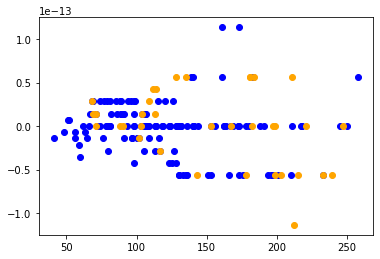

In [396]:
# plot

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c = "blue", label = "training data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c = "orange", label = "testing data")
plt.title("Residual Plot")
plt.show()

ValueError: x and y must be the same size

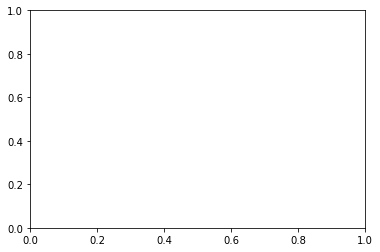

In [400]:
plt.scatter(X_train, y_train)
plt.plot(X_train, predictions, color="red")

In [397]:
linear_predictions = model.predict(X_test)
linear_predictions

array([[ 71.],
       [ 88.],
       [153.],
       [184.],
       [ 90.],
       [104.],
       [211.],
       [117.],
       [112.],
       [178.],
       [181.],
       [102.],
       [143.],
       [167.],
       [215.],
       [199.],
       [135.],
       [203.],
       [114.],
       [ 71.],
       [113.],
       [ 69.],
       [128.],
       [197.],
       [181.],
       [182.],
       [ 68.],
       [212.],
       [199.],
       [247.],
       [233.],
       [239.],
       [109.],
       [221.],
       [103.]])

In [399]:
# Relevant metrics - score, r2, mse, rmse, std
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#score = model.score(X, y, sample_weight=None)
r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, predictions) #
rmse = np.sqrt(mse)
r2_adjusted = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
#std = np.std(y)
print(r2)
print(mse)
print(rmse)
print(r2_adjusted)

1.0
1.771375893232279e-27
4.208771665500849e-14
1.0


In [ ]:
# Evaluate the Model

In [ ]:
# Relevant metrics - score, r2, mse, rmse, std
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [ ]:
# Print releveant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

In [ ]:
# decision tree regression

In [402]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score

In [405]:
regressor_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
regressor_model = regressor_model.fit(X_train, y_train)
regressor_predictions = regressor_model.predict(X_test)
regressor_score = regressor_model.score(X_train, y_train)

print(f"Model Accuracy {regressor_score*100}%")
#print(f"MSE", metrics.mean_squared_error(y,test, regressor_predictions))


Model Accuracy 0.0%


In [ ]:
# random forest tree regression

In [ ]:
# gbdt